In [297]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [298]:
M = int(input())

70


In [299]:
x = np.random.randint(-1000,1000,size=(M))
y = np.random.randint(-500,1000,size=(M))

In [300]:
print(x)
print(y)

[ 712 -483 -234 -919  275 -266 -932 -687 -867  315  966 -148 -133 -581
 -889  183 -575  414  400 -923  245  -55  339 -508 -721 -102  642 -671
   40  246   10  423 -813  232 -576 -242 -918 -867  865 -237  -73 -753
  908  126  364  734  180 -233  -93  138  176 -603  300  517  886 -327
  244 -792 -783 -716 -214  128  247 -404 -982  -23 -493 -888  267 -805]
[ 330 -103 -439  961  193  960 -231  144  782  322  -69  453  948 -262
  650  -35  906 -163 -389  439 -351  891 -382 -475  702 -262 -448  706
  620  752  368  441  592  348 -313  602  289 -160   26  190    4  590
  243  835  521 -137 -396  914  168  560  720 -267 -355 -494 -313   97
 -447 -151 -279  679  206  527 -280  768 -483  245 -392  607  740 -431]


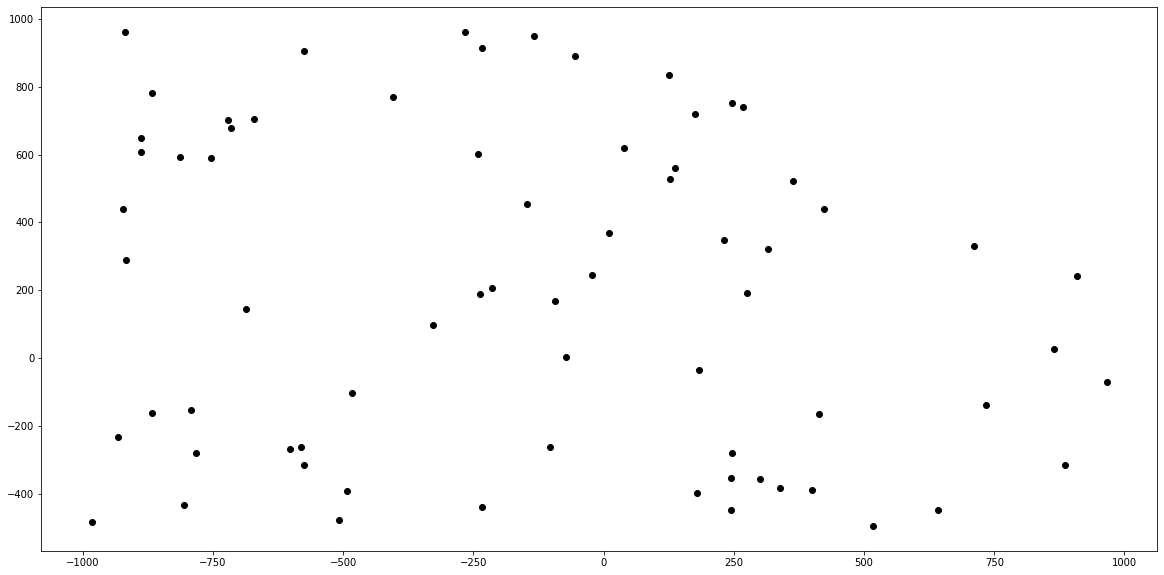

In [301]:
plt.scatter(x,y,edgecolors = 'black',color='black')

In [302]:
# We are going to perform K Means Clustering with K = 2 (manually)

In [303]:
# Taking 2 random points from given data. For this purpose we will choose 2 distinct random indexes

ptone = random.randrange(M)
pttwo = 0
while(pttwo==ptone):
    pttwo = random.randrange(M)

First Centroid : (423, 441) , Second Centroid : (712, 330)



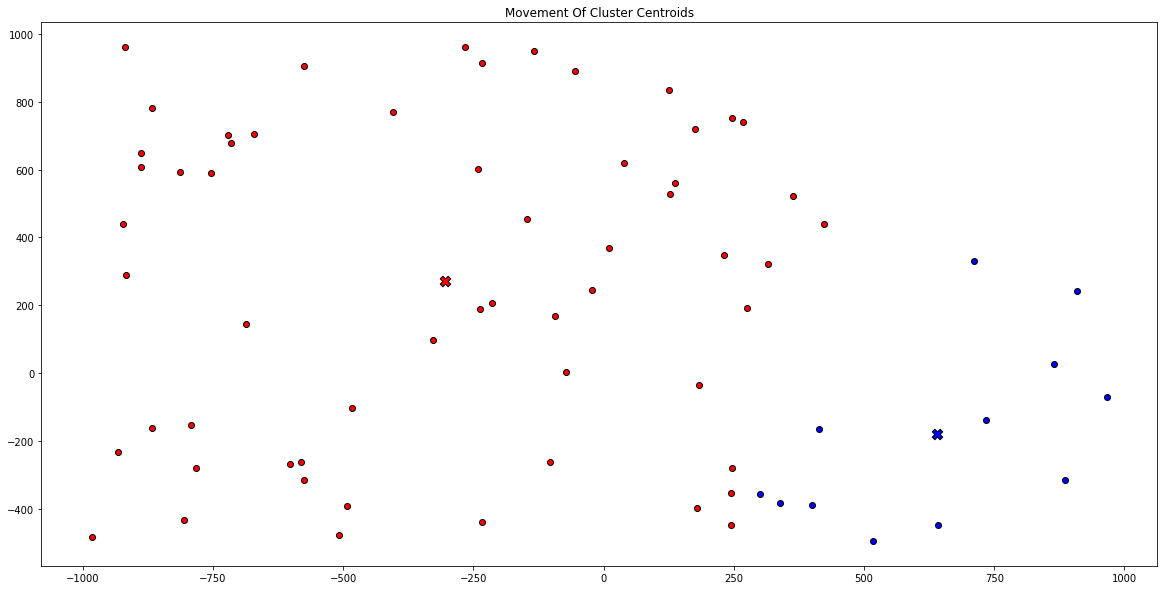

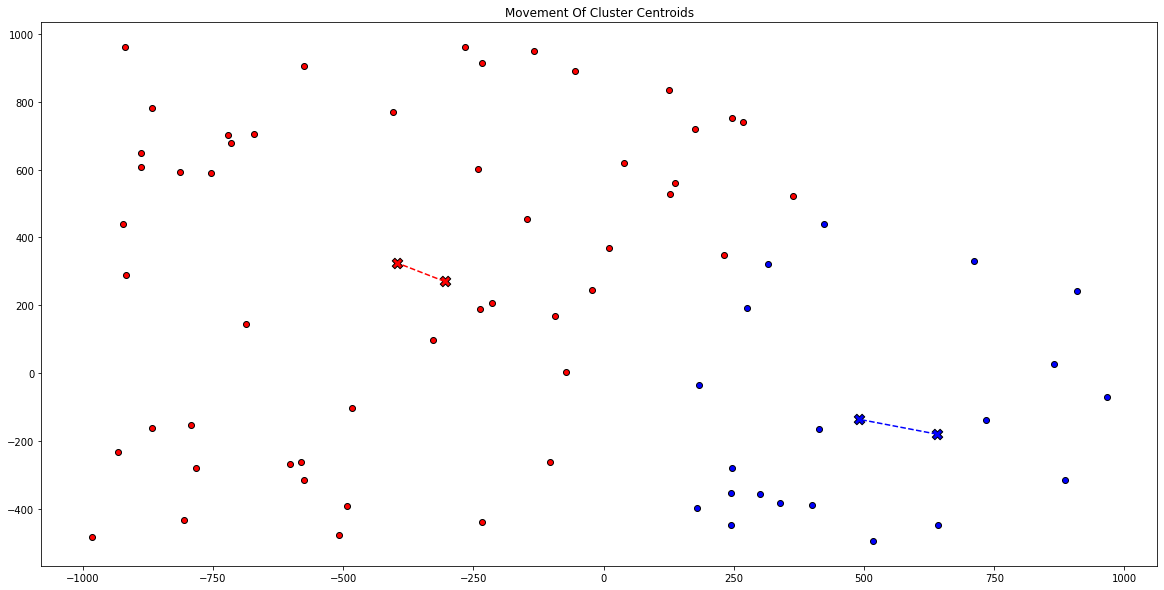

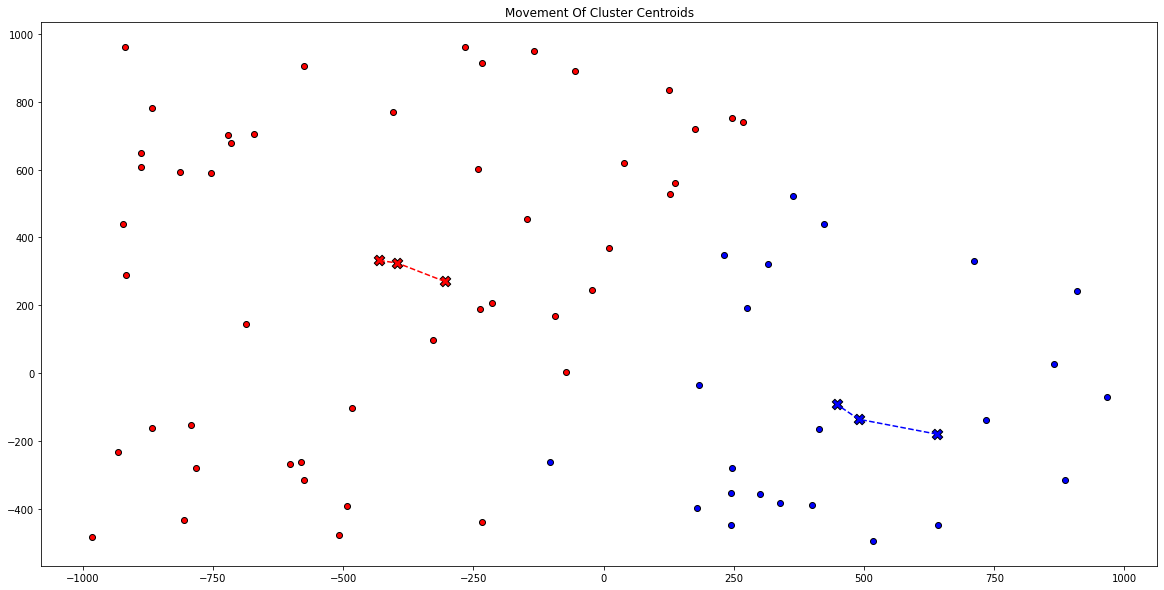

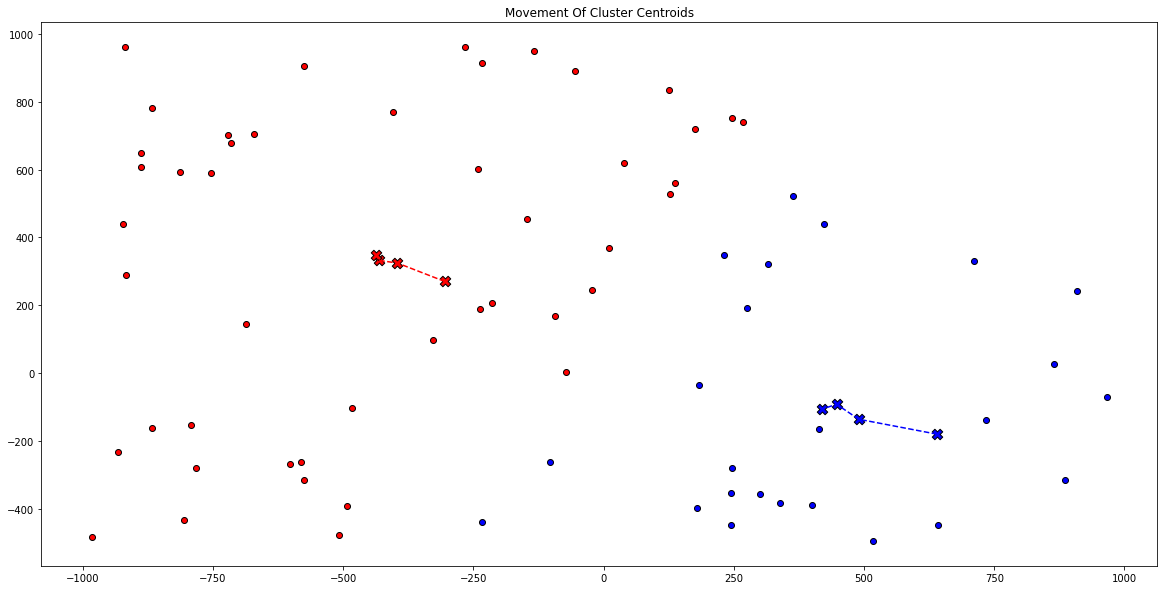

In [304]:
# Points to be taken
ct1x = x[ptone]
ct1y = y[ptone]
ct2x = x[pttwo]
ct2y = y[pttwo]
print('First Centroid : {} , Second Centroid : {}\n'.format((ct1x,ct1y),(ct2x,ct2y)))

# Creating four lists for storing points of two clusters

clus1x = []
clus1y = []
clus2x = []
clus2y = []
centresx1 = []
centresy1 = []
centresx2 = []
centresy2 = []

# Distance function for classifying a single example

def dist(ctx,cty,px,py):
    xdis = (ctx - px)**2
    ydis = (cty - py)**2
    return (xdis + ydis)



# Classifier function for putting an example under either of the two clusters

def classify(x,y,ct1x,ct1y,ct2x,ct2y):
    clus1x.clear(), clus1y.clear(), clus2x.clear(), clus2y.clear()
    for i in range(len(x)):
        dis1 = dist(ct1x,ct1y,x[i],y[i])
        dis2 = dist(ct2x,ct2y,x[i],y[i])
        if dis1 <= dis2 :
            clus1x.append(x[i])
            clus1y.append(y[i])
        else :
            clus2x.append(x[i])
            clus2y.append(y[i])
        
        
# Update function for updating the cluster centroids

def update_centres():
    global ct1x
    global ct1y
    global ct2x
    global ct2y
    ct1x = sum(clus1x)/len(clus1x)
    ct1y = sum(clus1y)/len(clus1y)
    ct2x = sum(clus2x)/len(clus2x)
    ct2y = sum(clus2y)/len(clus2y)
    

# Running K Means 

while(True):
    classify(x,y,ct1x,ct1y,ct2x,ct2y)
    ct1xtemp = ct1x
    ct1ytemp = ct1y
    ct2xtemp = ct2x
    ct2ytemp = ct2y
    update_centres()
    if ct1x==ct1xtemp and ct1y==ct1ytemp and ct2x==ct2xtemp and ct2y==ct2ytemp:
        break
    centresx1.append(ct1x), centresy1.append(ct1y), centresx2.append(ct2x), centresy2.append(ct2y)
    plt.scatter(centresx1,centresy1,s=110,edgecolors='black',color='r',marker='X')
    plt.plot(centresx1,centresy1,color='r',linestyle='dashed')
    plt.scatter(centresx2,centresy2,s=110,edgecolors='black',color='b',marker='X')
    plt.plot(centresx2,centresy2,color='b',linestyle='dashed')
#     print('Current Centroids : {} , {}'.format((ct1x,ct1y),(ct2x,ct2y)))
    plt.scatter(clus1x,clus1y,edgecolors='black',color='r')
    plt.scatter(clus2x,clus2y,edgecolors='black',color='b')
    plt.title("Movement Of Cluster Centroids")
    plt.show()

In [305]:
print('Updated Centroids : {} , {}'.format((ct1x,ct1y),(ct2x,ct2y)))

Updated Centroids : (-436.1304347826087, 349.30434782608694) , (418.9583333333333, -105.66666666666667)


In [306]:
print(clus1x)

[-483, -919, -266, -932, -687, -867, -148, -133, -581, -889, -575, -923, -55, -508, -721, -671, 40, 246, 10, -813, -576, -242, -918, -867, -237, -73, -753, 126, -233, -93, 138, 176, -603, -327, -792, -783, -716, -214, 128, -404, -982, -23, -493, -888, 267, -805]


In [307]:
print(clus1y)

[-103, 961, 960, -231, 144, 782, 453, 948, -262, 650, 906, 439, 891, -475, 702, 706, 620, 752, 368, 592, -313, 602, 289, -160, 190, 4, 590, 835, 914, 168, 560, 720, -267, 97, -151, -279, 679, 206, 527, 768, -483, 245, -392, 607, 740, -431]


In [308]:
print(clus2x)

[712, -234, 275, 315, 966, 183, 414, 400, 245, 339, -102, 642, 423, 232, 865, 908, 364, 734, 180, 300, 517, 886, 244, 247]


In [287]:
print(clus2y)

[745, 632, 28, 652, 825, 490, 683, 299, 425, 991, -190, -461, -119, -105, -366, -236, 448, -8, -427, 37, 856, -23, 959, 544, 100, -438, 171, 957, 274, 480, 679, 654, 832, 301, 20, 224, 413, 806, 318, 776, 607, 350, 858, -25, 529]
